# Time Series

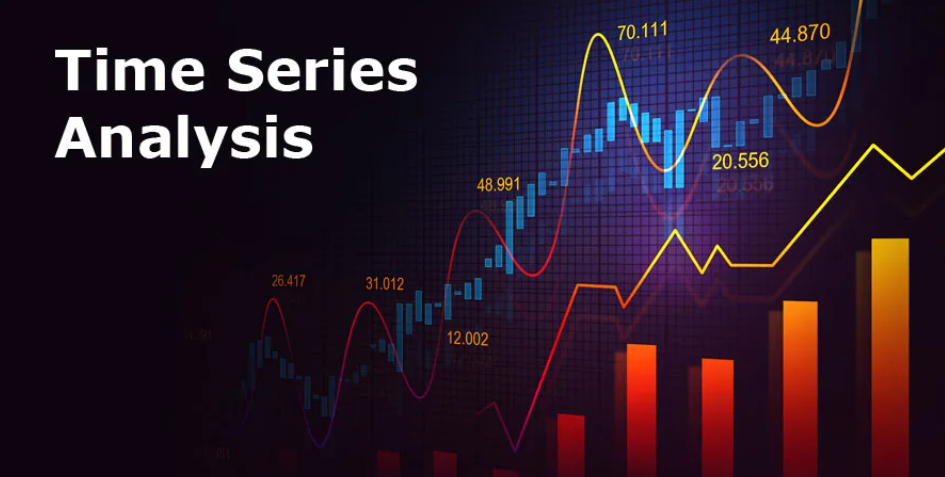

### What is a Time Series?
A time series is a sequence of data points collected or recorded at regular intervals over a period of time. Each data point is associated with a specific timestamp, for example the time intervals can be annually, quarterly, monthly, weekly, daily, hourly. Time series data is found in various domains, such as finance (stock prices),training (weekly feedback), weather (temperature over time), and more. 

**Time Period**:- The Interval of Time is recorded between one set to next set is called time period.

**The interval between difference observation need to be identical and the data should be in chronological order**

### What is Forecasting?

Forecasting is to predict or estimate a future event or trend, For businesses and analysts, forecasting is determining what is going to happen in the future by analyzing what happened in the past and what is going on now (The Forecasting is done based on the lags of timestamp)

#### Now will understand how time series different from the regular regression problem,

where as non time series data is an Interpolation and time series data is an Extrapolation(where we are forecasting the future) 

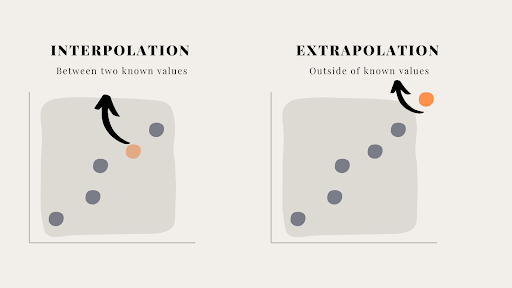

## Interpolation vs. Extrapolation:

#### Interpolation:

- Interpolation is the process of estimating values within the range of known data points.
- It's used to fill in missing data or estimate values between existing observations.
- Example: Estimating the property price based on the square feet 

#### Extrapolation:

- Extrapolation is the process of predicting values outside the range of known data points.
- It extends a trend or relationship beyond the observed data.
- Example: Predicting future stock prices based on historical data.

where as the extrapolation is quite uncertain and difficult (the uncertainty or the error will be keep on growing because it is dependent on previous uncertain datapoint

# Notation of Time Series

## X = Independent Feature (ex:- Adani stocks)
## T = Entire Period (Data collected from 2012 to 2018)
## t = A single Period (ex:- 01/01/2012)

### Approacing time series data

The time series does not fallow the gaussion(normal) distribution and the data should be in chronological order, because of this we cannot use regular regression problem statement,
so we use time series modeling. The way we are going to split the data is by 80 to 20 ration (not by random sample split). Time series data assumes that past pattern in the variable will continue unchanged into the future using this approach we are going to forecast the future values. 

# Components of Time Series

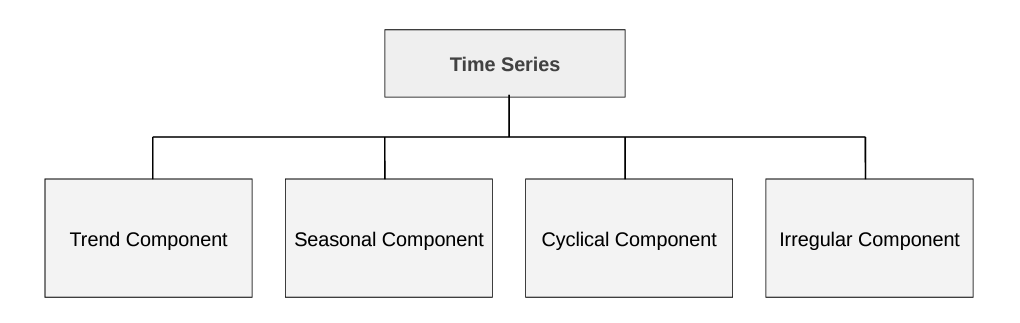

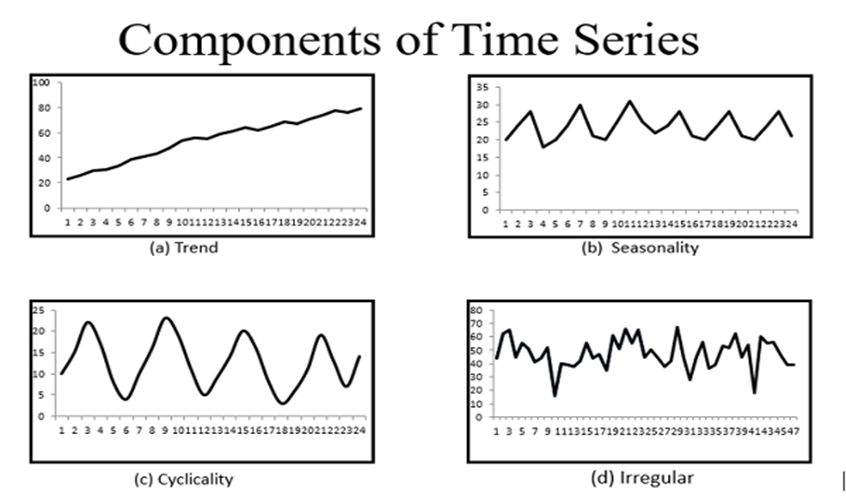

**Trend:-** Time series data can also have a long-term trend, indicating an overall upward or downward movement over time. Understanding trends helps in making predictions. 
Type of Trends:-
- Uptrends
- Downtrends
- Horizontal Trends
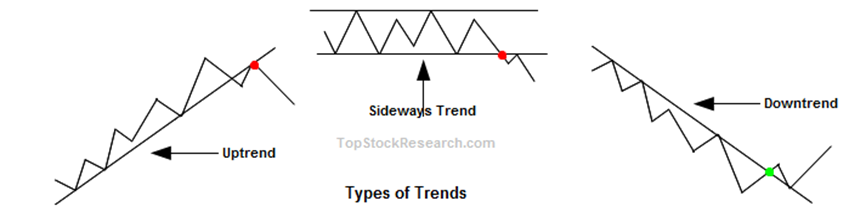

**Seasonality:-** It means Periodic Fluctuations. For Example retail Sales tend to peak for the christmas season and then decline after the holidays. So time series of retail sales will typically show increasing sales from September through December and declining sales in January and February. its nothing but fixed interval shift with short time.
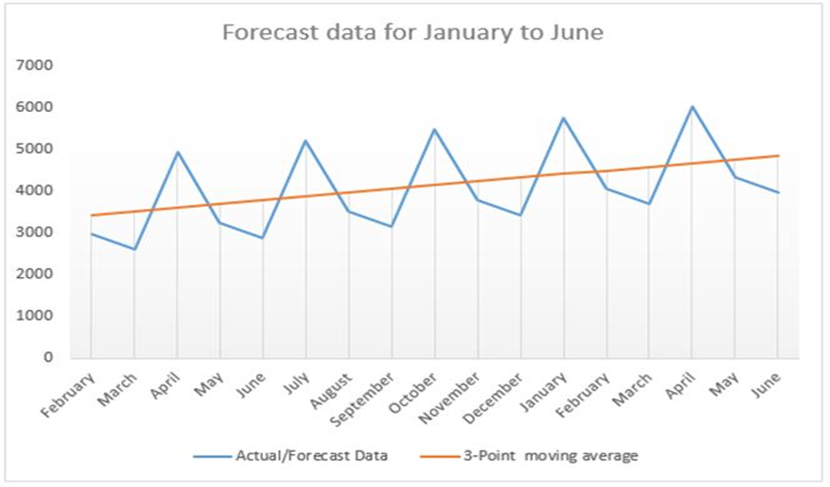

**Cyclic:-**  Component refers to a pattern or fluctuation in the data that occurs with no fixed interval of time, 
for example:- Longer-Term Fluctuationsy.

**Irregular:-** Components refers to noise, that represents the unexplained and unpredictable fluctuations generally during short periods ex:- Earthquake
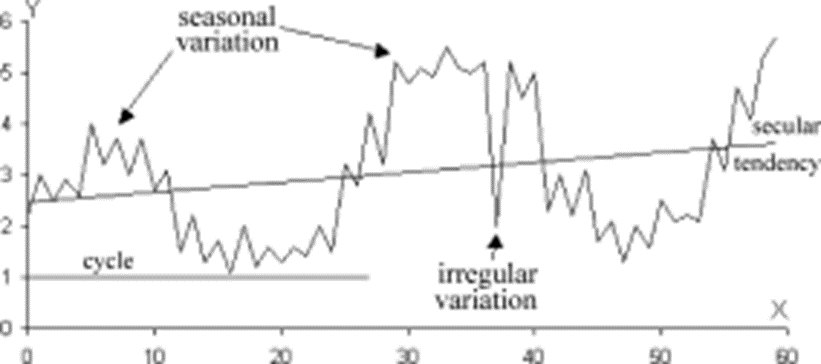

#### This are the above time series component makes our model more complex or difficult

## White Noise

White noise is a series of data points where there is no pattern, trend, or correlation between the data points. Because there is no pattern we cannot predict white noise

### Components of White Noise
1. Constant Mean
2. Constant Variance
3. No Autocorrelation

### What is Auto-Correlation?

Auto-Correlation measures that the data points are correlated with the past version of itself 
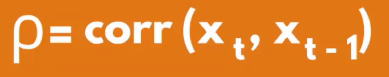

**No Autocorrelation means - No clear relationship between past and present value**

----------------------------------------------------------------------------------------------------------------------

###  Rolling Statistics will smoothen the data, this will help you to make your mean & variance constant, Rolling statistics makes your data stationary

### What is Smoothing ?

• Smoothing is a data preprocessing techniques to remove noise from a data set,
This allows important patterns to stand out.        
• The idea behind data smoothing is that it can identify simplified changes to help predict different trends and patterns

### MOVING AVERAGE SMOOTHING (MAS)  

In MAS time series derived from the average of last kth elements of the series

●Smaller values of k lead to more variation in the result        
●Larger value of k leads to more smoothness.

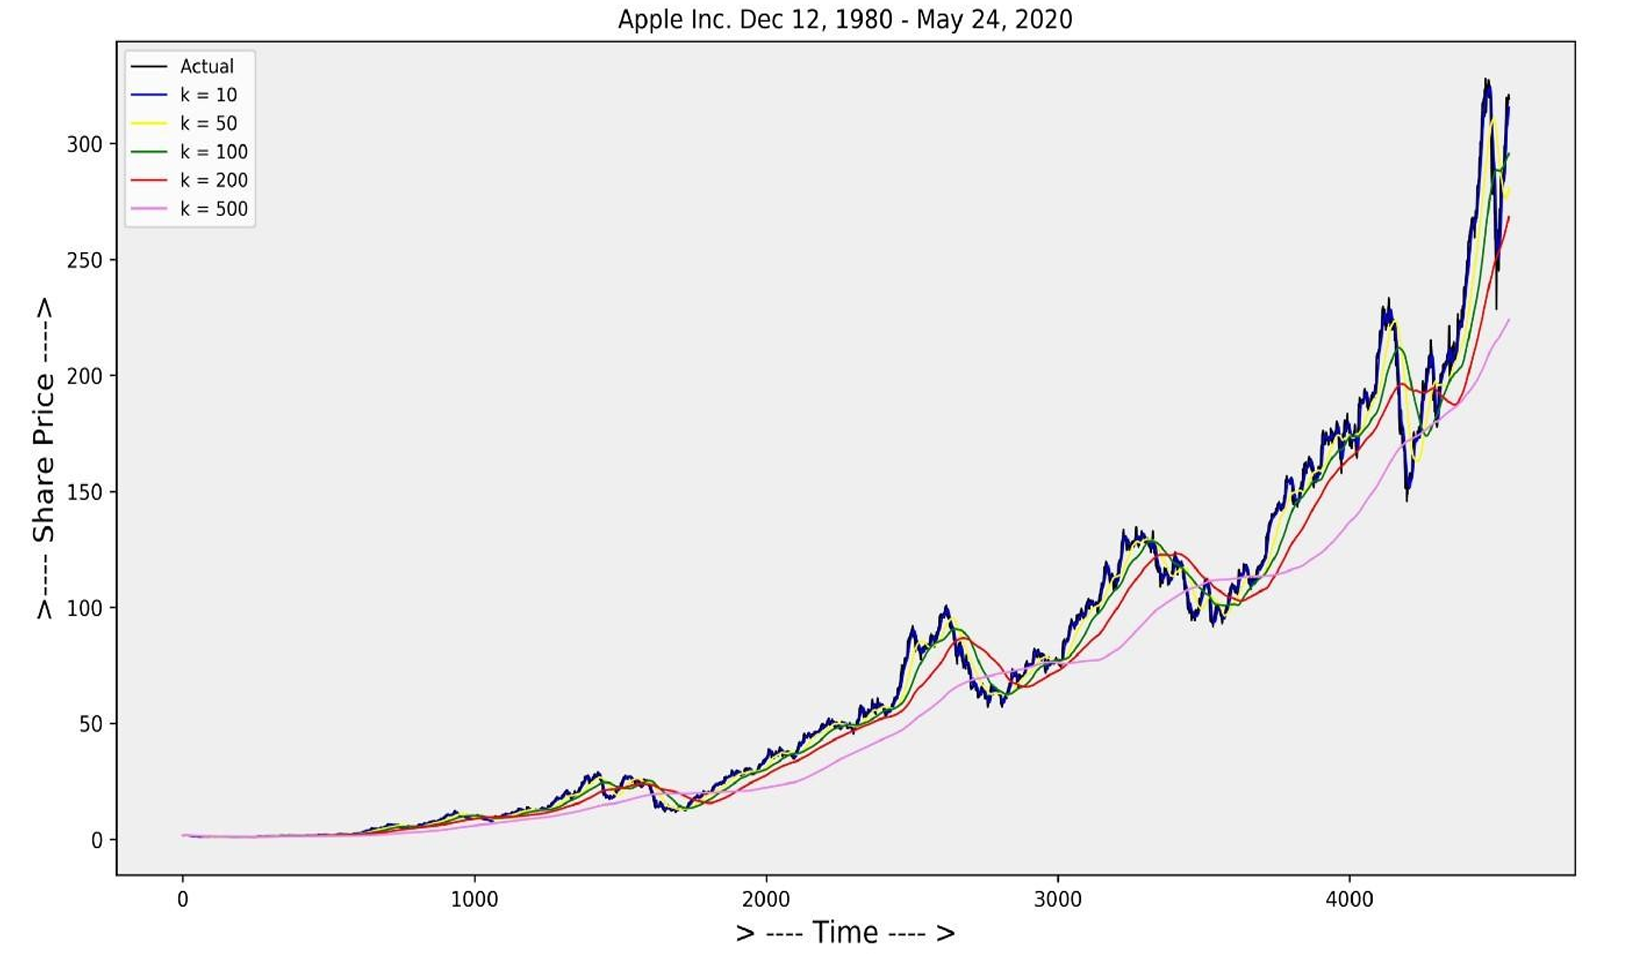

We have 2 different type of moving average

1. Simple Moving Average (SMA):
2. Exponential Moving Average (EMA):

**Simple Moving Average (SMA):-** The simple moving average is the most basic type of moving average. It calculates the average of a fixed number of data points within the moving window.             


**Exponential Moving Average (EMA):-** The exponential moving average gives more weight to recent data points while still considering historical data. It uses an exponentially weighted factor to calculate the average.        
                

### Now will perform some hands-on for better understanding time series 

### Import the necessary libraries

In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Importing the Dataset

In [128]:
data = pd.read_csv('stocks.csv')

### Basic EDA

In [129]:
# Now will print top 5 records 
data.head()

,date,Adani,ITC,Infosys,Tata
0,7/1/1994,469.90,2224.95,3445.98,18124.01
1,10/1/1994,475.27,2225.00,3440.58,18443.44
2,11/1/1994,474.13,2228.10,3413.77,18485.25
3,12/1/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [130]:
# Now will check for missing values
data.isnull().sum()

date       0
Adani      0
ITC        0
Infosys    0
Tata       0
dtype: int64

In [131]:
# Now will check the summarized statistics information
data.describe()

,Adani,ITC,Infosys,Tata
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [132]:
# Now will check information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     6269 non-null   object 
 1   Adani    6269 non-null   float64
 2   ITC      6269 non-null   float64
 3   Infosys  6269 non-null   float64
 4   Tata     6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


We can see that the date is in object datatype we want to change it into datetime format


In [133]:
data.date = pd.to_datetime(data.date,format = '%d/%m/%Y')

In [134]:
data.head()

,date,Adani,ITC,Infosys,Tata
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [135]:
data.dtypes

date       datetime64[ns]
Adani             float64
ITC               float64
Infosys           float64
Tata              float64
dtype: object

In [136]:
data.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

The date we have captured from 07/Jan/1994 to 29/Jan/2018

### Now will convert date column to index, To perform further analysis

In [137]:
data = data.set_index('date')

In [138]:
data.head()

,Adani,ITC,Infosys,Tata
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Now we all know that the date should be in chronological order but we can see that some information is missing for ex:- 1994-01-08 and 1994-01-09 is not present so we want to check with desired date frequency
    
    

In [139]:
data.asfreq('d').head()   # asfreq will help us to capture desired date frequency, "d" is date format

,Adani,ITC,Infosys,Tata
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [140]:
data.asfreq('w').head()    # capturing weekly

,Adani,ITC,Infosys,Tata
date,,,,
1994-01-09,NaN,NaN,NaN,NaN
1994-01-16,NaN,NaN,NaN,NaN
1994-01-23,NaN,NaN,NaN,NaN
1994-01-30,NaN,NaN,NaN,NaN
1994-02-06,NaN,NaN,NaN,NaN


In [141]:
data.asfreq('m').head()    # capturing monthly

,Adani,ITC,Infosys,Tata
date,,,,
1994-01-31,481.61,2192.60,3491.83,20229.12
1994-02-28,467.14,2103.24,3328.10,19997.20
1994-03-31,445.77,2142.88,3086.40,19111.92
1994-04-30,NaN,NaN,NaN,NaN
1994-05-31,456.50,2137.34,2970.50,20973.59


In [142]:
data.asfreq('a').head()     # capturing Anualy (yearly)

,Adani,ITC,Infosys,Tata
date,,,,
1994-12-31,NaN,NaN,NaN,NaN
1995-12-31,NaN,NaN,NaN,NaN
1996-12-31,740.74,2880.07,4118.50,19361.35
1997-12-31,970.43,4224.30,5135.50,15258.74
1998-12-31,1229.23,5006.57,5882.58,13842.17


#### Now as we all know that the stocks doesnot works on weekends and holidays (so we should only record during working days or business days)

In [143]:
data.asfreq('b').head()      # capturing business days

,Adani,ITC,Infosys,Tata
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the frequency for business days

In [144]:
data = data.asfreq('b')

### Now will check for missing values

In [145]:
data.isnull().sum()

Adani      8
ITC        8
Infosys    8
Tata       8
dtype: int64

### we can see there are 8 missing values, Now will try to print those records

In [146]:
data[data.isnull().any(axis=1)]

,Adani,ITC,Infosys,Tata
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


#### We can see on the 1st of Jan the stocks data is not captured so will try to fill it

In time series we have various method of treating missing values         
1. Front Filling :- Assigns the value of the previous day.
2. Back Filling :- Assigns the value for the next period.

In [147]:
ff = data.fillna(method = "ffill")

In [148]:
ff.loc['2017-12-29':'2018-01-01']

,Adani,ITC,Infosys,Tata
date,,,,
2017-12-29,2673.610523,12917.64,7687.772698,22764.94
2018-01-01,2673.610523,12917.64,7687.772698,22764.94


In [149]:
bf = data.fillna(method = "bfill")

In [150]:
bf.loc['2017-12-29':'2018-01-02']

,Adani,ITC,Infosys,Tata
date,,,,
2017-12-29,2673.610523,12917.64,7687.772698,22764.94
2018-01-01,2695.809772,12871.39,7648.096000,22764.94
2018-01-02,2695.809772,12871.39,7648.096000,22764.94


### Now will treat the missing values based on the previous day stock price

In [151]:
data = data.fillna(method = "ffill")

In [152]:
data.isnull().sum()

Adani      0
ITC        0
Infosys    0
Tata       0
dtype: int64

### Now will plot the data to check if there is any trend or Seasonality present in the data

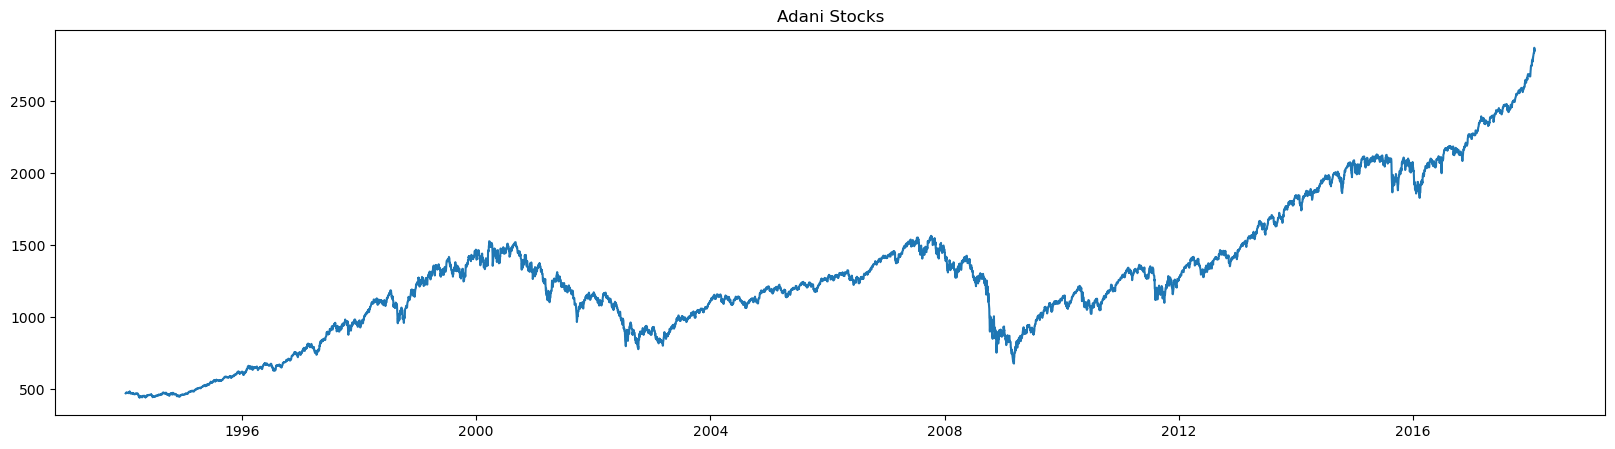

In [153]:
plt.figure(figsize = (20,5))
plt.plot(data.Adani)
plt.title('Adani Stocks')
plt.show()

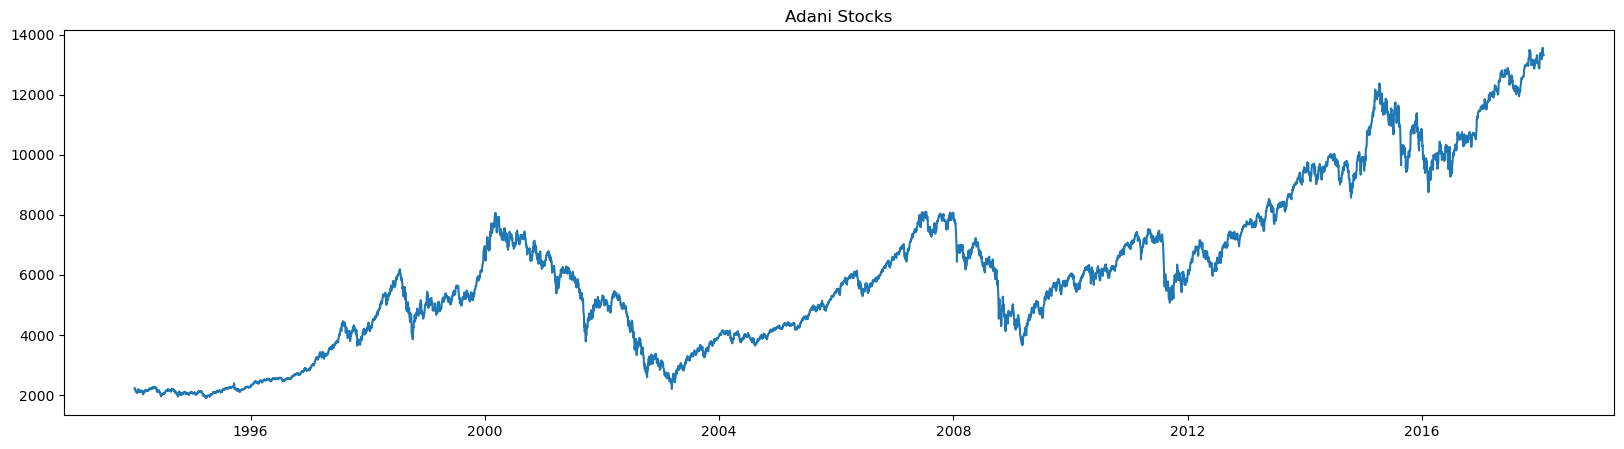

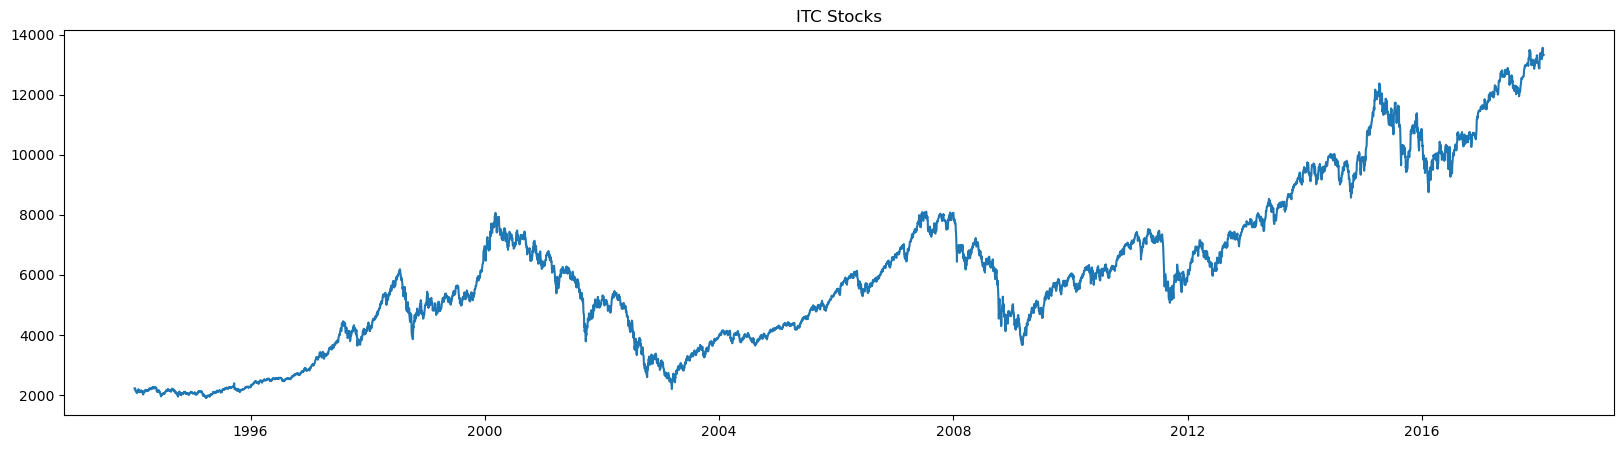

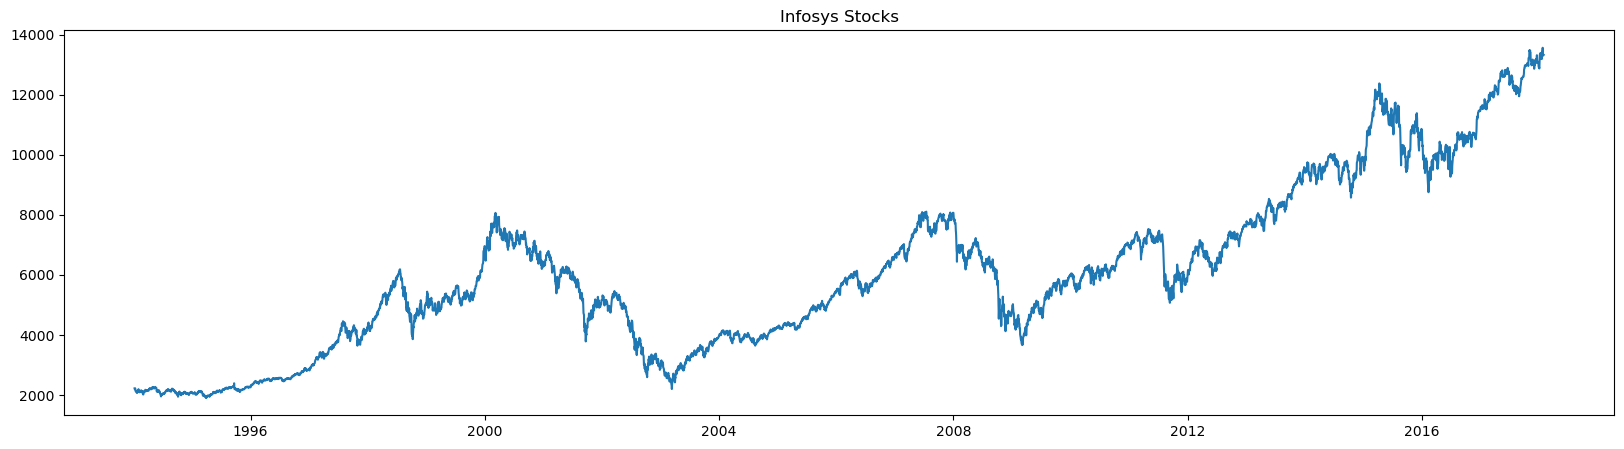

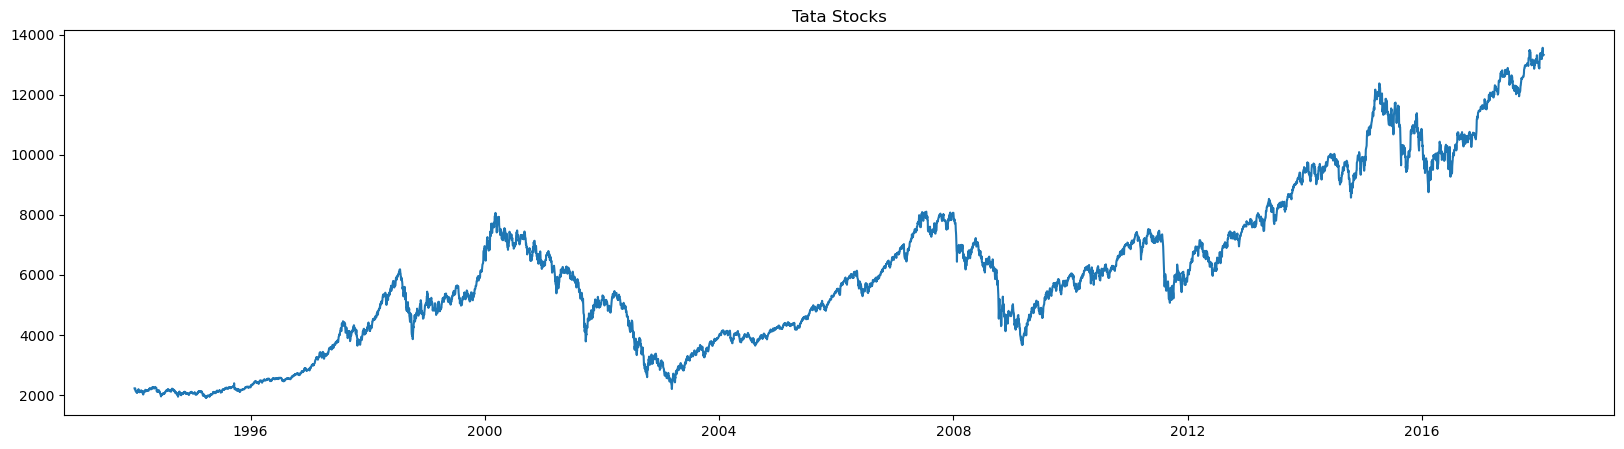

In [154]:
for i in data.columns:
    if i != 'date':
        plt.figure(figsize = (20,5))
        plt.plot(data.ITC)
        plt.title(str(i) + ' Stocks')
        plt.show()

In [155]:
data.columns

Index(['Adani', 'ITC', 'Infosys', 'Tata'], dtype='object')

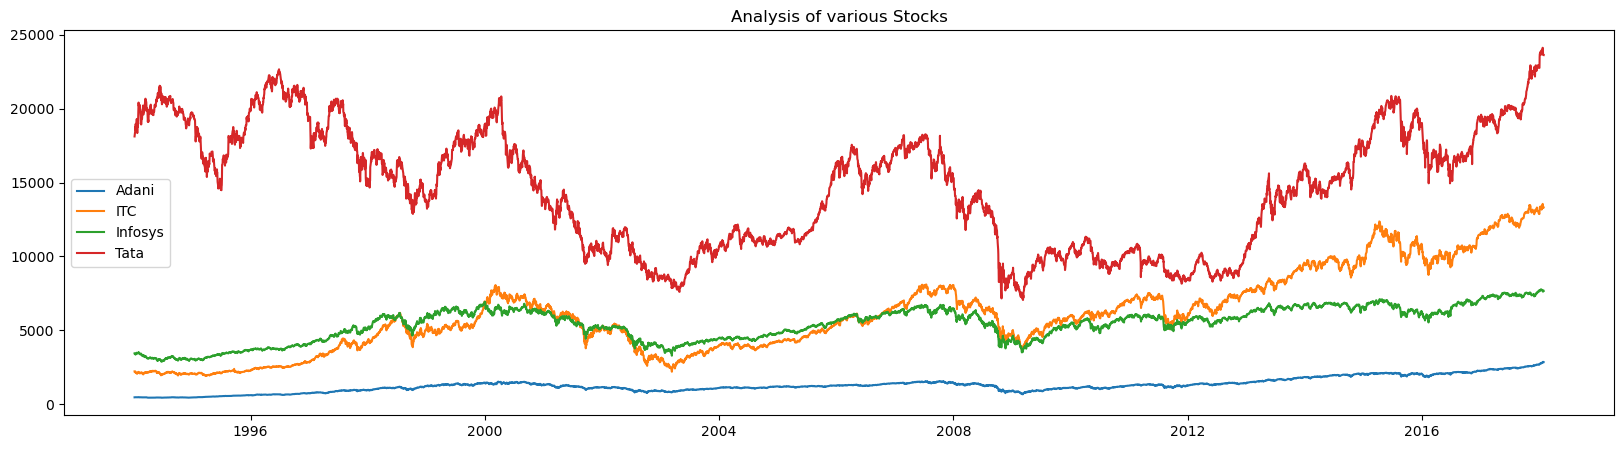

In [156]:
plt.figure(figsize = (20,5))
plt.plot(data.Adani, label = 'Adani')
plt.plot(data.ITC, label = 'ITC')
plt.plot(data.Infosys, label = 'Infosys')
plt.plot(data.Tata, label = 'Tata')
plt.title('Analysis of various Stocks')
plt.legend()
plt.show()

### Splitting the data into train and test set

In [157]:
# In time series we need to keep our data into chronological order so we want to split into 80-20 ratio

train_size = int(len(data)*0.8)

In [158]:
train_size

5021

In [159]:
data_train = data.iloc[0:train_size]
data_test = data.iloc[train_size:]

In [160]:
data_train.tail()

,Adani,ITC,Infosys,Tata
date,,,,
2013-04-01,1562.173837,7795.31,6411.74,12135.02
2013-04-02,1570.252238,7943.87,6490.66,12003.43
2013-04-03,1553.686978,7874.75,6420.28,12362.20
2013-04-04,1559.979316,7817.39,6344.11,12634.54
2013-04-05,1553.278930,7658.75,6249.77,12833.64


In [161]:
data_test.head()

,Adani,ITC,Infosys,Tata
date,,,,
2013-04-08,1563.071269,7662.64,6276.94,13192.59
2013-04-09,1568.607909,7637.51,6313.20,13192.35
2013-04-10,1587.731827,7810.63,6387.37,13288.13
2013-04-11,1593.369863,7871.63,6416.14,13549.16
2013-04-12,1588.854623,7744.77,6384.39,13485.14


### Now will try see the difference between the regular data and white noise data

### White Noise

In [162]:
# Now will try to create our own white noise data by using numpy and will keep mean as the mean of adani stocks and standard deviation of adani stocks 

wn = np.random.normal(loc = data.Adani.mean(), scale = data.Adani.std(), size = len(data))

<Axes: ylabel='Density'>

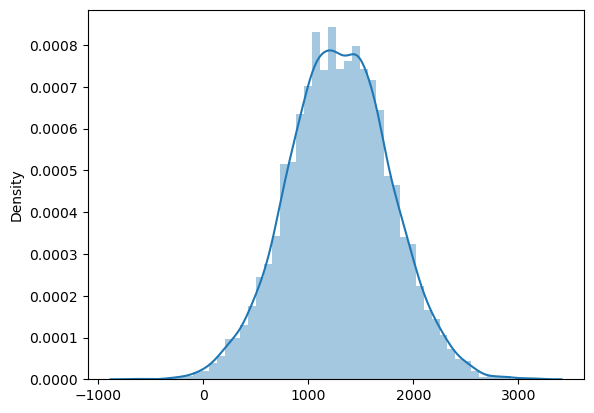

In [163]:
# We can see that the white noise is normaly distributed, as we discussed the data in the time series should not be normaly distributed
sns.distplot(wn)

In [164]:
data['wn'] = wn

In [165]:
data[['Adani','wn']].describe()

,Adani,wn
count,6277.000000,6277.000000
mean,1288.642547,1297.266952
std,487.868210,481.817641
min,438.920000,-631.790623
25%,992.715221,973.317858
50%,1233.761241,1294.159555
75%,1460.250000,1622.376119
max,2872.867839,3158.835979


### Now will plot the White noise data

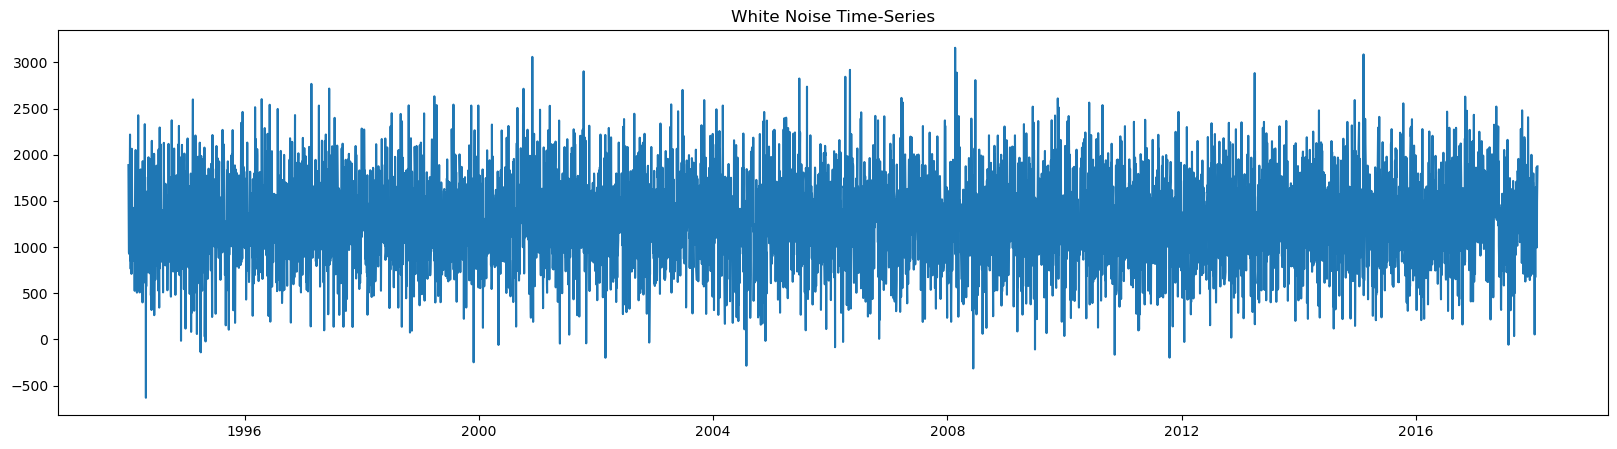

In [166]:
plt.figure(figsize = (20,5))
plt.plot(data.wn)
plt.title('White Noise Time-Series')
plt.show()

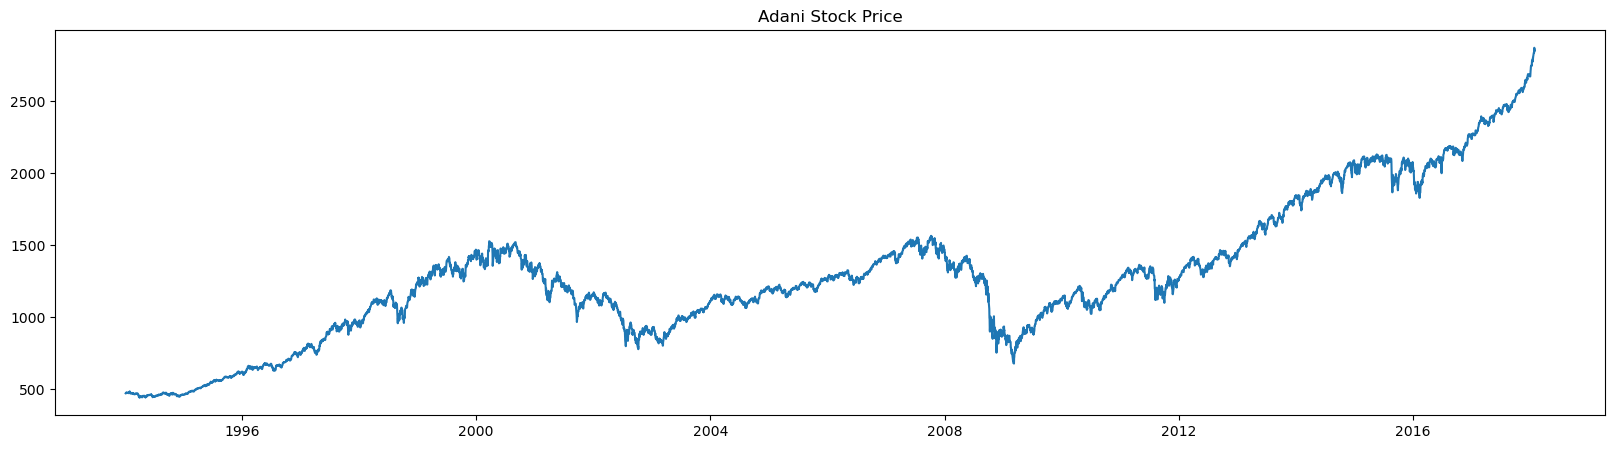

In [167]:
plt.figure(figsize = (20,5))
plt.plot(data.Adani)
plt.title('Adani Stock Price')
plt.show()

### Before building time series model we need to check if the time series data is stationary or not

### What is Stationary?

#### Stationary in Time Series means then Mean, Variance & Covariance of the series should not be a function of time rather should be constant

#### Time Series Data can be stationary by removing their various components:
- Trend 
- Seasonality
- Cyclic
- Irregularity 

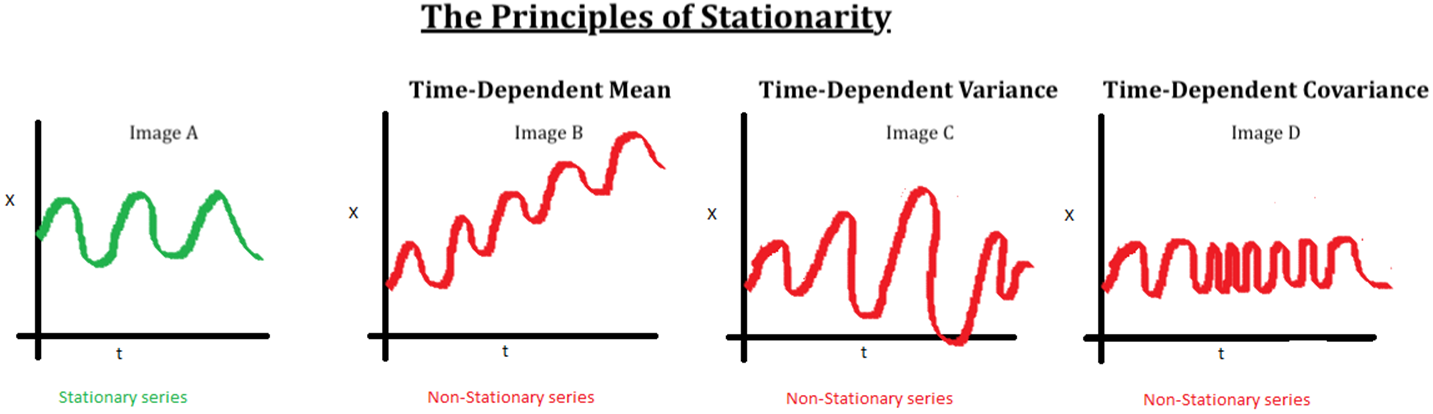

#### What are the Conditions need to be followed to satisfy Stationary 

- Constant Mean
- Constant Variance
- Autocovariance does not depend on time 

#### Reason behind the non-stationarity of time series

- Trend in series
- Seasonality of time series

#### TEST TO CHECK STATIONARITY

- Rolling Statistics: Plot the moving average or variance and see if it varies with time
- ADF Test (Augmented Dickey–Fuller Test): 

For ADF Test:- Null hypothesis is that the time series is nonstationary. Alternative hypothesis stats that the time series data is stationary.

### Rolling Statistics:

#### Checking for white Noise data

In [194]:
def moving_average(data, window_size):
    moving_averages = []
    for i in range(len(data1) - window_size + 1):
        window = data1[i:i+window_size]
        average = sum(window) / window_size
        moving_averages.append(round(average,2))
    
    return moving_averages

data1 = data['wn'].values
window_size = 2
result = moving_average(data, window_size)
print(result)

[1416.12, 936.05, 1215.38, 1459.73, 1415.69, 1816.81, 1660.51, 978.17, 1045.49, 1000.55, 1144.03, 1669.73, 1262.87, 1180.37, 1857.97, 1633.82, 1266.58, 1185.7, 1144.5, 1217.91, 1212.0, 1329.53, 1139.14, 1140.67, 1219.38, 1047.16, 804.01, 876.82, 1212.7, 1151.98, 1578.53, 1496.03, 1036.46, 1412.37, 1288.89, 703.42, 514.24, 864.56, 1482.8, 1135.32, 1094.17, 1863.62, 2246.84, 2020.61, 1583.91, 1387.4, 985.71, 1216.38, 1327.16, 740.84, 775.9, 1146.94, 1470.89, 1765.79, 1734.59, 1440.97, 1342.82, 1410.13, 1446.33, 1630.27, 1371.13, 693.47, 1165.93, 1445.69, 1185.33, 1120.32, 1031.11, 1188.31, 880.75, 1119.76, 1465.85, 1820.13, 1847.38, 1561.2, 1609.67, 1530.13, 484.15, 476.19, 1079.69, 968.53, 1431.83, 1351.37, 1027.97, 1229.04, 1303.33, 1078.27, 1368.56, 1154.68, 1349.07, 1843.73, 1464.99, 1427.4, 1261.89, 1224.12, 1450.41, 1301.09, 1491.49, 1214.0, 1329.92, 1213.91, 627.02, 547.32, 1099.86, 2015.96, 1594.0, 1115.08, 1203.97, 1362.85, 1445.32, 1054.12, 858.43, 1196.71, 1023.0, 1325.81, 113

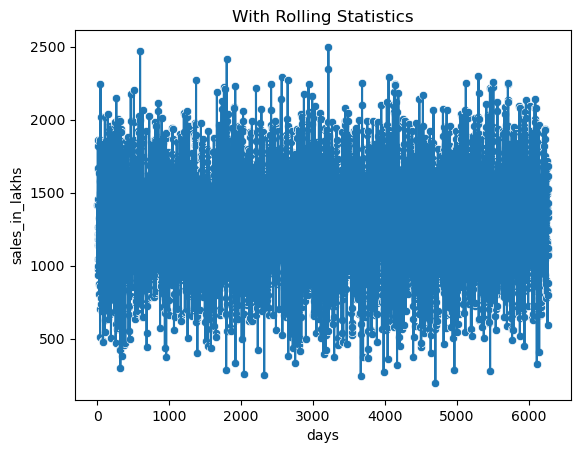

In [195]:
sns.scatterplot(x=list(range(len(result))),y = result)
plt.plot(result)
plt.title('With Rolling Statistics')
plt.xlabel('days')
plt.ylabel('sales_in_lakhs')
plt.show()

#### Checking for Adani Stock dataset

In [196]:
def moving_average(data, window_size):
    moving_averages = []
    for i in range(len(data1) - window_size + 1):
        window = data1[i:i+window_size]
        average = sum(window) / window_size
        moving_averages.append(round(average,2))
    
    return moving_averages

data1 = data['Adani'].values
window_size = 2
result = moving_average(data, window_size)
print(result)

[472.58, 474.7, 474.15, 473.32, 473.69, 474.1, 473.78, 474.28, 474.64, 474.85, 473.34, 471.45, 472.06, 475.12, 477.88, 480.16, 480.62, 480.81, 481.36, 475.26, 470.78, 471.4, 471.91, 470.85, 469.56, 470.21, 471.38, 472.66, 471.56, 469.02, 467.69, 469.58, 471.08, 467.48, 465.16, 466.6, 465.79, 464.62, 463.91, 463.88, 465.83, 466.4, 466.47, 465.48, 465.17, 466.92, 467.2, 468.22, 470.16, 470.98, 469.8, 468.67, 468.67, 466.45, 462.46, 460.29, 456.24, 449.02, 445.66, 445.77, 442.34, 443.6, 448.17, 449.46, 448.99, 448.48, 448.72, 446.92, 446.32, 446.28, 444.32, 442.5, 442.25, 445.34, 448.18, 450.17, 452.29, 451.87, 450.48, 450.0, 451.96, 453.02, 452.38, 451.55, 449.6, 445.07, 444.16, 443.75, 442.62, 443.94, 444.32, 446.93, 451.53, 455.08, 455.7, 454.06, 454.0, 455.58, 456.7, 457.2, 457.33, 456.92, 457.06, 457.64, 458.89, 459.5, 458.54, 457.64, 457.46, 458.26, 458.88, 460.74, 461.49, 461.27, 460.19, 456.96, 453.41, 452.22, 451.36, 446.22, 445.06, 446.69, 446.85, 445.95, 445.24, 446.2, 446.28, 

In [197]:
data['Adani'].values

array([ 469.9     ,  475.27    ,  474.13    , ..., 2839.253031,
       2872.867839, 2853.528411])

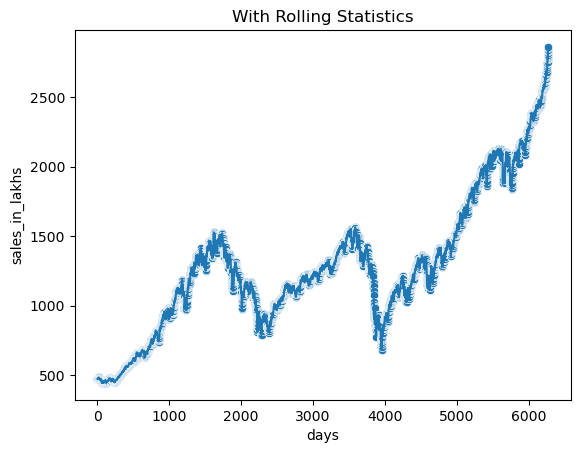

In [198]:
sns.scatterplot(x=list(range(len(result))),y = result)
plt.plot(result)
plt.title('With Rolling Statistics')
plt.xlabel('days')
plt.ylabel('sales_in_lakhs')
plt.show()

Now by seeing this plot we can easily state that the moving average of Adani Stocks of variance is varies with time

### ADF Test

In [168]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF Test
ADF_result = adfuller(data.Adani)

# Extract and print the p-value
p_value = ADF_result[1]

print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print("Null hypothesis rejected. The data is stationary.")
else:
    print("Null hypothesis not rejected. The data is not stationary.")


p-value: 0.9953796476080692
Null hypothesis not rejected. The data is not stationary.


### Now will run for white noise data

In [169]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF Test
ADF_result = adfuller(data.wn)

# Extract and print the p-value
p_value = ADF_result[1]

print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print("Null hypothesis rejected. The data is stationary.")
else:
    print("Null hypothesis not rejected. The data is not stationary.")

p-value: 0.0
Null hypothesis rejected. The data is stationary.
